In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
RANDOM_SEED = 0x0

# TASK 1 (4 Points): K-Means using scikit-learn

First we will generate some data. The variable `X` will contain the data used in this section.

In [3]:
from sklearn.datasets import make_blobs

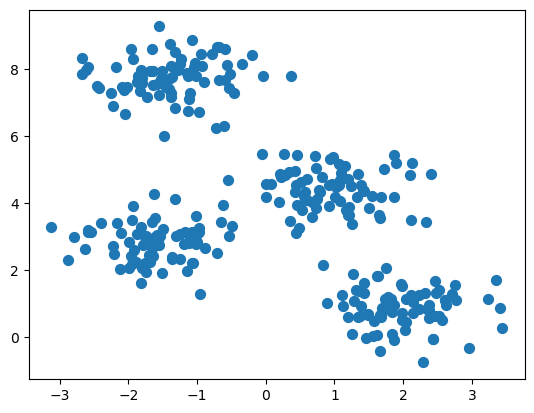

In [5]:
X, _ = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=.6,
    random_state=RANDOM_SEED,
)

plt.scatter(X[:, 0], X[:, 1], s=50)

### Task 1a

Cluster the above data using the K-Means implementation provided by scikit-learn.
Refer to the official documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

* create an instance of the class `sklearn.cluster.KMeans`
* choose a suitable value for the `n_clusters` parameter
* call the `.fit` method to compute the clustering
* call the `.predict` method to get cluster labels for each data point

In [6]:
from sklearn.cluster import KMeans

In [7]:
# Create an instance of KMeans with K=4 (based on visual inspection)
kmeans = KMeans(n_clusters=4, random_state=0x0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.predict(X)

### Task 1b

Try different numbers of clusters, compute the average silhouette scores using
`sklearn.metrics.silhouette_score` and plot the silhouette plot for the different values of K. Refer to the documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score>



In [8]:
from sklearn.metrics import silhouette_score

For n_clusters = 2, the silhouette score is 0.455
For n_clusters = 3, the silhouette score is 0.589
For n_clusters = 4, the silhouette score is 0.682
For n_clusters = 5, the silhouette score is 0.582
For n_clusters = 6, the silhouette score is 0.485
For n_clusters = 7, the silhouette score is 0.497
For n_clusters = 8, the silhouette score is 0.404
For n_clusters = 9, the silhouette score is 0.399


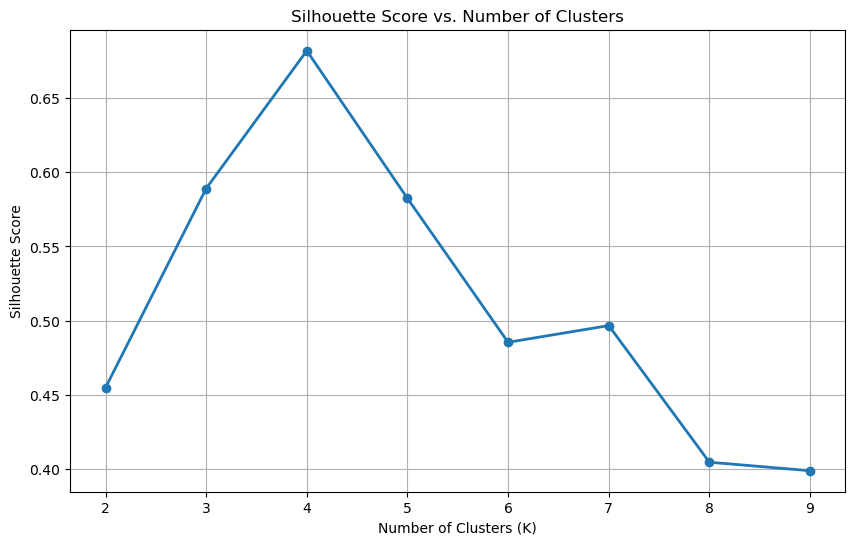

In [10]:
# Try different values of K
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0x0)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'o-', linewidth=2)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

### Task 1c

Select the number of clusters K using the silhouette method. Visualize the resulting clustering for in a scatter plot by using different colors for each cluster and also depicting the cluster centroids.

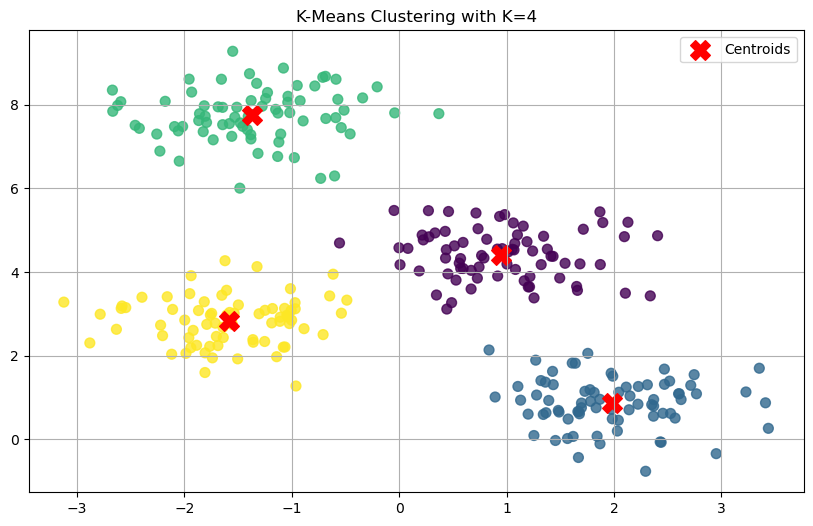

In [11]:
# Based on the silhouette analysis, select the optimal K (e.g., K=4)
optimal_k = 4  # This would be chosen based on the silhouette scores

# Create a new KMeans model with the optimal K
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=0x0)
optimal_labels = optimal_kmeans.fit_predict(X)
centers = optimal_kmeans.cluster_centers_

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=optimal_labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering with K={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()

## 📢 **HAND-IN** 📢:
1. The plot of the average silhouette scores for different values of K
2. The optimal K you selected based on the plots of the silhouette scores
3. The scatter plot of the clustering results depicting also the centroids for the optimal K

# TASK 2: DBSCAN

First, let's setup the data used in this section. We will redefine the variable `X` containing the data to be clustered.

In [12]:
from sklearn.datasets import make_moons

In [13]:
X, _ = make_moons(
    n_samples=200,
    noise=.05,
    random_state=RANDOM_SEED,
)

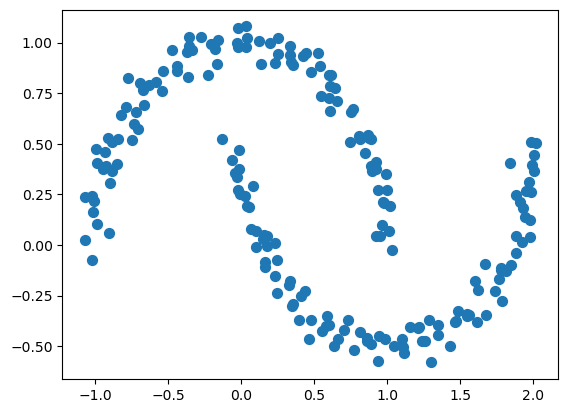

In [14]:
plt.scatter(X[:, 0], X[:, 1], s=50)

### Task 2a

* cluster the new data `X` using `KMeans`
* set `n_clusters=2`
* visualize and analyse the resulting clustering
* What do you think of the result?

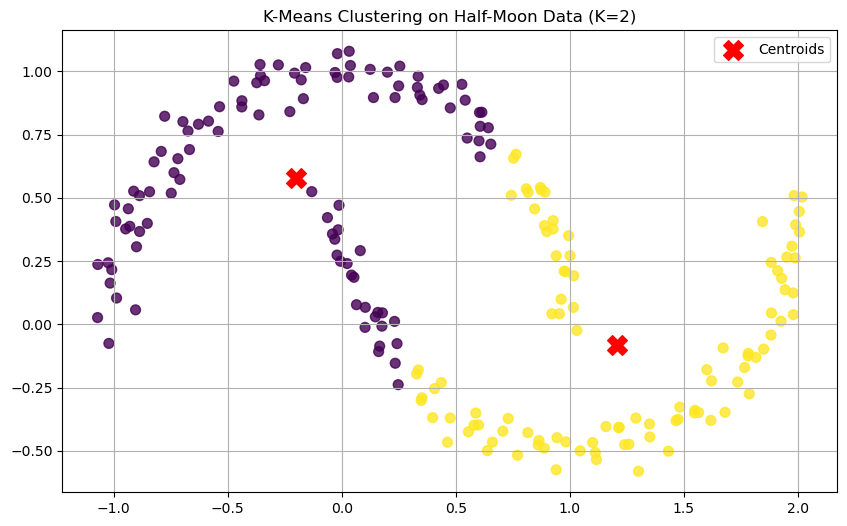

In [15]:
# Create a KMeans model with K=2
kmeans = KMeans(n_clusters=2, random_state=0x0)
kmeans_labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# Visualize K-Means clustering
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering on Half-Moon Data (K=2)')
plt.legend()
plt.grid(True)
plt.show()

### Task 2b

Let's use `sklearn.cluster.DBSCAN` instead. Refer to the documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html>

* cluster the data using `DBSCAN`
* try different values for `eps` and `min_samples` until you manage to obtain good clustering of the two half-moons

In [16]:
from sklearn.cluster import DBSCAN

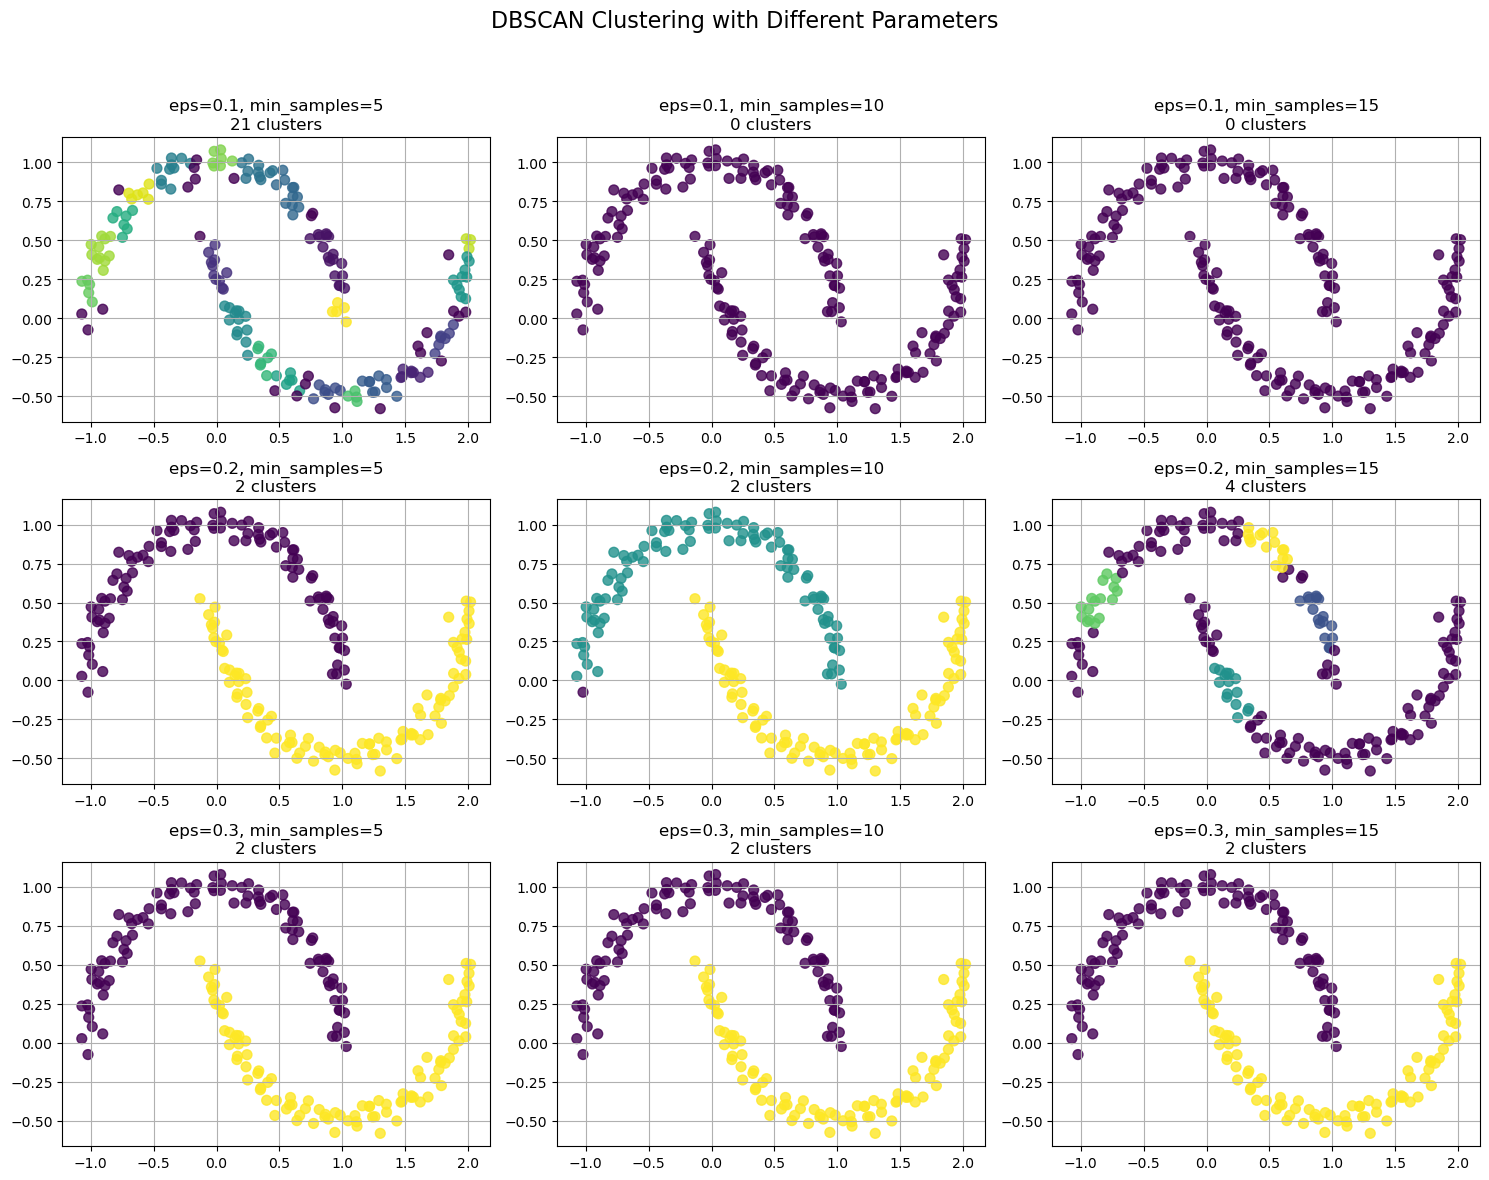

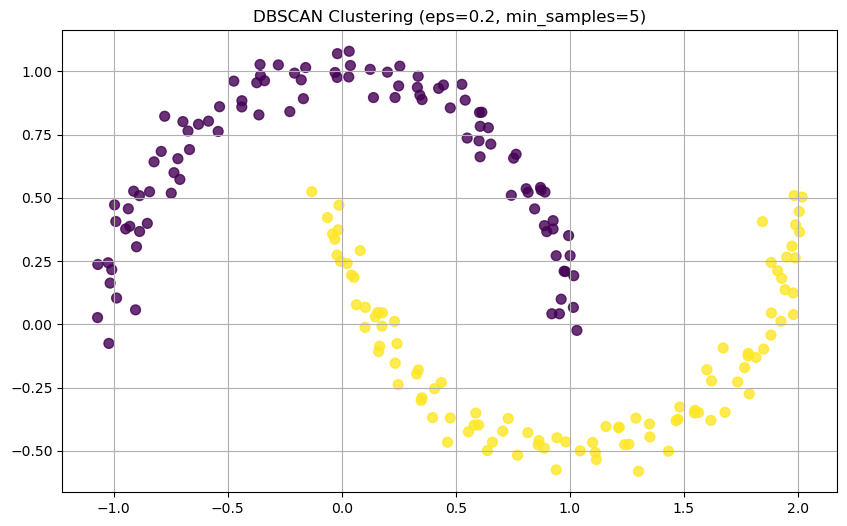

In [17]:
# Try different values for eps and min_samples
eps_values = [0.1, 0.2, 0.3]
min_samples_values = [5, 10, 15]

# Create a grid of subplots
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 12))
fig.suptitle('DBSCAN Clustering with Different Parameters', fontsize=16)

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Create and fit DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X)
        
        # Count the number of clusters (excluding noise points)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        
        # Plot the clustering result
        axes[i, j].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.8)
        axes[i, j].set_title(f'eps={eps}, min_samples={min_samples}\n{n_clusters} clusters')
        axes[i, j].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Choose the best parameters based on visual inspection
# For example: eps=0.2, min_samples=5 might work well
best_eps = 0.2
best_min_samples = 5

# Final DBSCAN clustering with best parameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_dbscan.fit_predict(X)

# Visualize the final clustering
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.8)
plt.title(f'DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})')
plt.grid(True)
plt.show()

## 📢 **HAND-IN** 📢: No submission needed for this task.

# Task 3 (6 Points): Image Compression - Color Clustering in Images

K-Means can be used for image compression. This task focuses on appling this compression technique to an image.

We provide some useful helper functions below. Read the comments in the code carefully, but do not worry if you don't understand every line.


In [18]:
from PIL import Image
import requests
from io import BytesIO

In [19]:
def download_img(url: str) -> Image:
  """
  This function fetches an image from the internet and returns a PIL.Image object
  see: https://pillow.readthedocs.io/en/stable/reference/Image.html

  we tested it mainly on images from wikimedia
  """

  # have to set a fake user-agent so we dont get blocked by wikimedia
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
  r = requests.get(url, headers=headers)
  if r.status_code != 200:
    # if you hit this exception, consider using another image
    raise Exception(f"download failed:\n{url}")

  return Image.open(BytesIO(r.content)).convert("RGB")

def img2arr(img: Image) -> np.array:
  """
  convert a PIL.Image object to a numpy array
  the resulting array has 3 dimensions [height, width, 3]
  the last dimension contains rgb values

  the rgb values are normalized to be between 0. and 1.
  """
  return np.asarray(img) / 255

def arr2img(arr: np.array) -> Image:
  """
  convert a numpy array back into a PIL.Image object
  we expect the rgb values of the array to be between 0. and 1.
  """
  return Image.fromarray((arr * 255).astype(np.int8), mode="RGB")

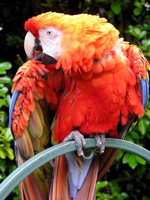

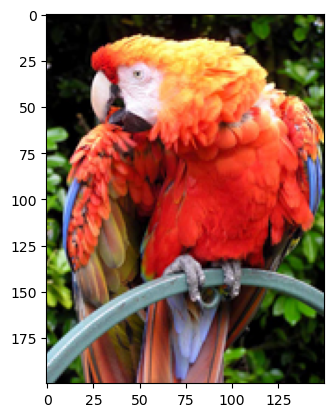

In [20]:
img_url = "https://upload.wikimedia.org/wikipedia/commons/d/d7/RGB_24bits_palette_sample_image.jpg"

img = download_img(img_url)

# you can visualize a PIL.Image object directly in jupyter using `display`
display(img)

img_arr = img2arr(img)

# visualize the np.array version of the same image
plt.imshow(img_arr)

In [21]:
from typing import Optional

def rg_chromaticity(color_arr: np.array) ->  np.array:
  """
  helper function
  """
  sums = np.sum(color_arr, axis=1, keepdims=True)
  normed = np.divide(color_arr, sums, where=sums > 0.)
  return normed

def rg_chroma_plot(img_arr: np.array, centers: Optional[np.array] = None):
  """
  plot an image in rg-chromaticity space
  this is a 2D representation of 3D rgb data
  refer to wikipedia for details: https://en.wikipedia.org/wiki/Rg_chromaticity

  Note: the resulting plot will not accurately reflect the original euclidean distances

  inputs:
  img_arr: a numpy array with 3 dimensions [height, width, 3] representing an image
  centers: a numpy array with 2 dimensions [n_centers, 3] representing the cluster centers
  """
  colors = np.copy(img_arr).reshape((-1, 3))
  colors = np.unique(colors, axis=0)
  img_rg = rg_chromaticity(colors)
  plt.scatter(img_rg[:, 0], img_rg[:, 1], c=[tuple(colors[i]) for i in range(colors.shape[0])], s=.1)

  if centers is not None:
    crg = rg_chromaticity(centers)
    plt.scatter(crg[:, 0], crg[:, 1], c="black", marker="x", s=25.)

  plt.xlabel("red")
  plt.ylabel("green")
  plt.show()


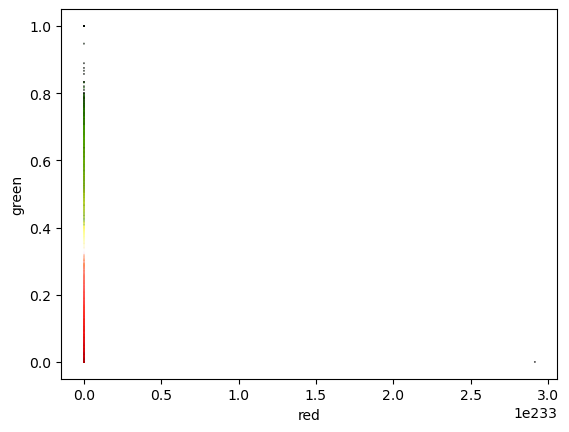

In [22]:
rg_chroma_plot(img_arr)

In [23]:
from sklearn.metrics import pairwise_distances_argmin

def replace_nearest_color(img_arr: np.array, centers: np.array):
  """
  replace each pixel color in `img_arr` by the closest color in `centers`

  input:
  img_arr: a numpy array with 3 dimensions [height, width, 3] representing an image
  centers: a numpy array with 2 dimensions [n_centers, 3] representing the cluster centers
  """
  colors = img_arr.reshape((-1, 3))
  labels = pairwise_distances_argmin(colors, centers)
  compressed = labels.reshape(img_arr.shape[:2])
  replaced = centers[compressed]
  return replaced


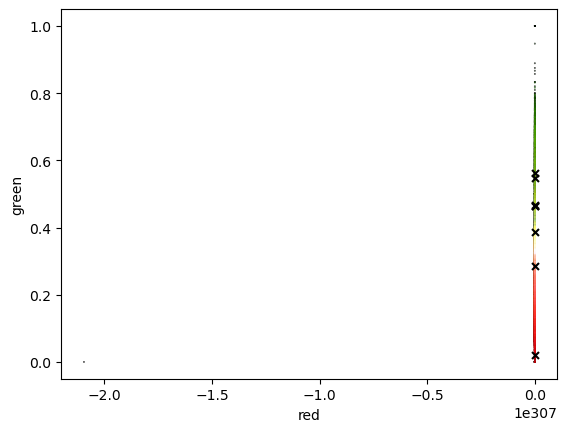

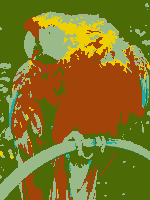

In [24]:
# generate 8 random colors for illustration
random_centers = np.random.default_rng(RANDOM_SEED).random(size=(8, 3))

# plot the random centers on top of the colors of the image
rg_chroma_plot(img_arr, random_centers)

# replace original colors by their nearest neighbors out of the candidate centers
replaced = replace_nearest_color(img_arr, random_centers)

# convert to PIL.Image and visualize
display(arr2img(replaced))

### Task 3 (continued)

* Use an image from [wikimedia](https://commons.wikimedia.org/wiki/Main_Page) to compress. Make sure that it is not too big, e.g. less than 1000px per side

* You can also use the same image we used in the example above

* download the image and convert it to a numpy array using the functions `download_img` and `img2arr` we defined above  

* Cluster the colors in the image using `KMeans`

* Choose the appropriate hyperparameters and verify them (e.g. using `silhouette_score` or the elbow method)

* Visualize your final cluster centers using `rg_chroma_plot` (see example usage above)

* Replace the colors of the original image by their nearest center using `replace_nearest_color` and display the result (see example usage above)

### Tips

* The images have 3 dimensions but the clustering algorithms expect 2. You can use [np.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) to obtain the dimension you need.
* To download the images you can right-click and save them to your computer.

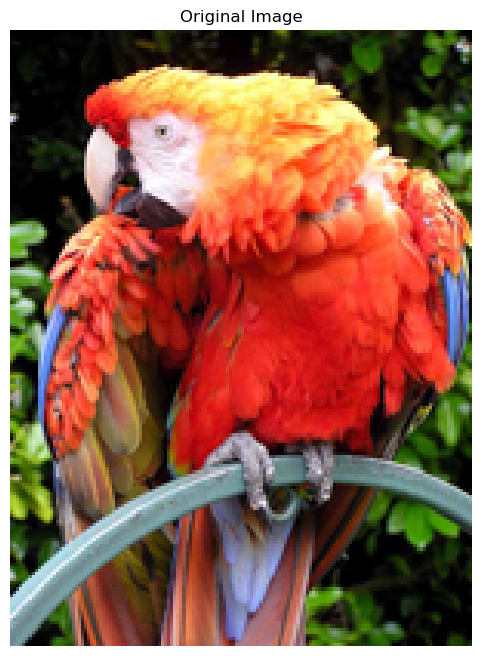

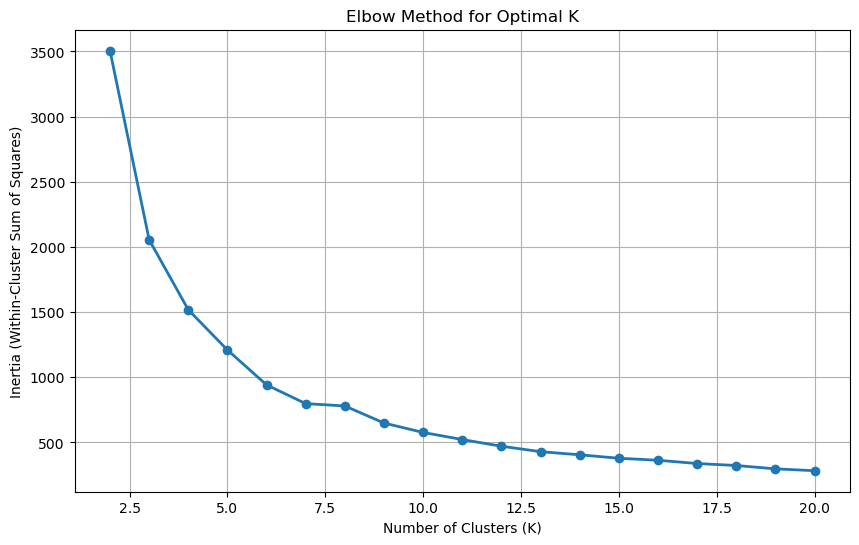

For k=2, silhouette score: 0.4592
For k=3, silhouette score: 0.4821
For k=4, silhouette score: 0.4956
For k=5, silhouette score: 0.4826
For k=6, silhouette score: 0.4521
For k=7, silhouette score: 0.4466
For k=8, silhouette score: 0.4120
For k=9, silhouette score: 0.4124


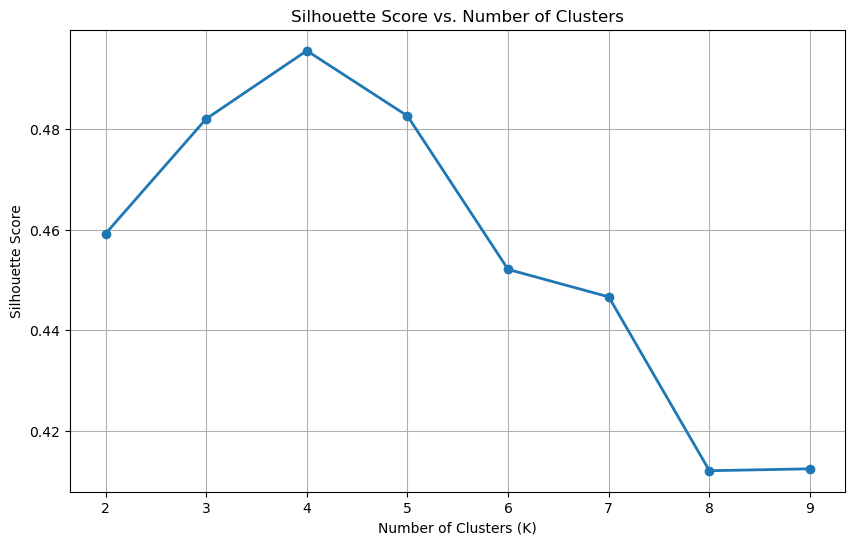

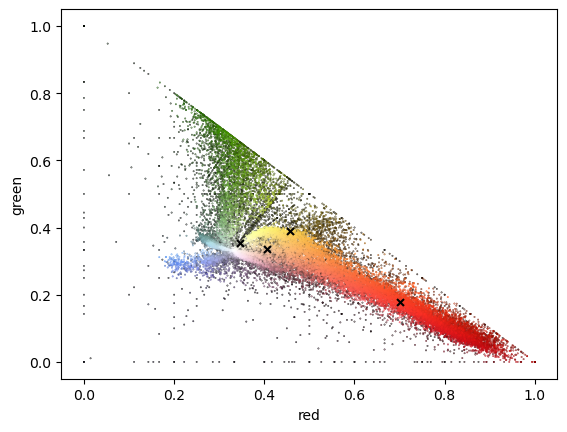

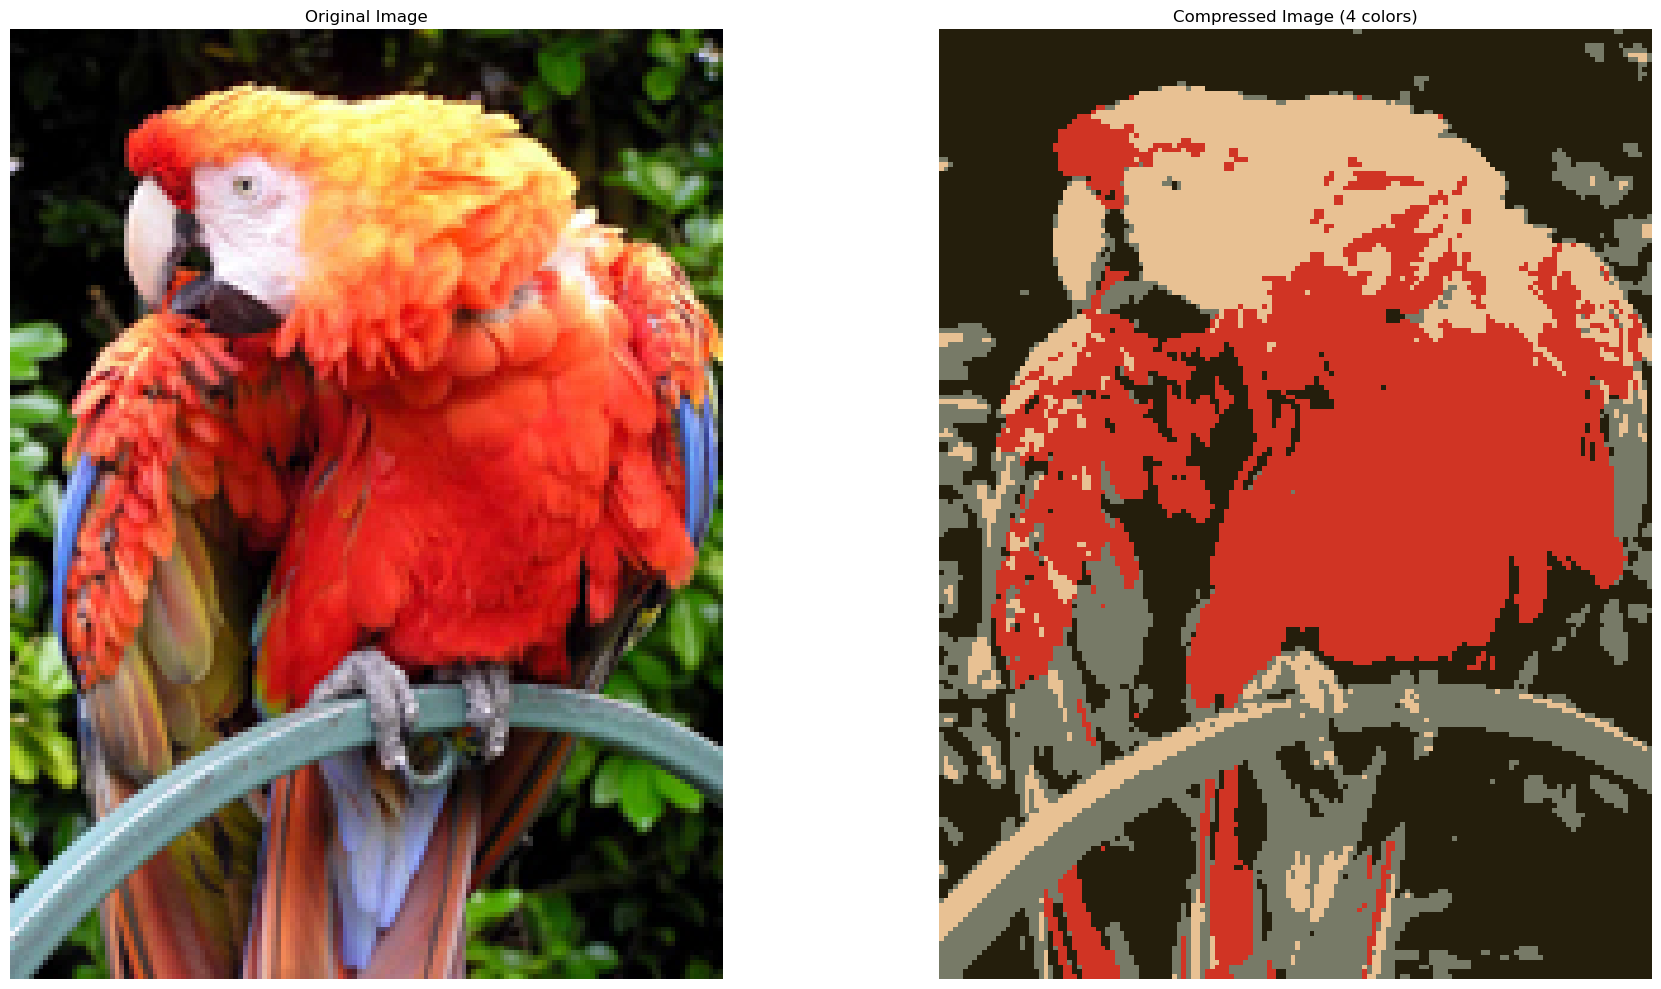

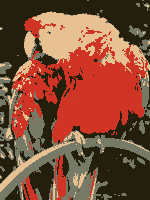

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/commons/d/d7/RGB_24bits_palette_sample_image.jpg"
img = download_img(img_url)
img_arr = img2arr(img)

plt.figure(figsize=(10, 8))
plt.imshow(img_arr)
plt.title("Original Image")
plt.axis('off')
plt.show()

colors = img_arr.reshape(-1, 3)

inertia_values = []
k_values = range(2, 21)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0x0)
    kmeans.fit(colors)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, 'o-', linewidth=2)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0x0)
    labels = kmeans.fit_predict(colors)
    score = silhouette_score(colors, labels)
    silhouette_scores.append(score)
    print(f"For k={k}, silhouette score: {score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, 'o-', linewidth=2)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

optimal_k = 4

final_kmeans = KMeans(n_clusters=optimal_k, random_state=0x0)
final_kmeans.fit(colors)
centers = final_kmeans.cluster_centers_

rg_chroma_plot(img_arr, centers)

compressed_img = replace_nearest_color(img_arr, centers)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img_arr)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(compressed_img)
axes[1].set_title(f"Compressed Image ({optimal_k} colors)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

compressed_pil = arr2img(compressed_img)
display(compressed_pil)

# Explanation:
# To determine the optimal number of clusters, I used both the elbow method to identify 
# where additional clusters provide diminishing returns and silhouette scores to find the 
# best cluster separation.


## 📢 **HAND-IN** 📢:

* The original image you used for this task if different than the example image

* The final (compressed) image showing the replaced colors

* Your code for computing the clustering

* Short (2-3 sentences) description on how you verified the clustering and selected the hyperparameters
